<a href="https://colab.research.google.com/github/s10114618/Machine-Learning-Intrusion-Detection/blob/master/Machine_Learning_IntrusionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this challenge, we will analyze some visualizations to understand the data better and then build an IDS. A good IDS will be able to identify if new traffic that is coming into a network is normal or not.

Intrusion Detection is the process of monitoring a system or network for malicious activities such as security threats or policy violations. While an intrusion prevention system (IPS) is software that has all the capabilities of IDS and can also attempt to stop possible incidents. 


NSL-KDD DataSet was created as part of a competition to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.target import ClassBalance

In [3]:
# all cols are retrieved from arff file. Last 2 cols are "label" and "difficulty" level
cols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root", "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

# Read Train data into Dataset
train_url = 'https://raw.githubusercontent.com/s10114618/Machine-Learning-Intrusion-Detection/master/data/KDDTrain%2B.txt'
df_train = pd.read_csv(train_url, header=None, names = cols)

# Read Test data into Dataset
test_url = 'https://raw.githubusercontent.com/s10114618/Machine-Learning-Intrusion-Detection/master/data/KDDTest%2B.txt'
df_test = pd.read_csv(test_url, header=None, names = cols)

# Know the size of df_train and df_test
print("Number of rows and columns for train dataset" + str(df_train.shape))
print("Number of rows and columns for train dataset" + str(df_test.shape))
df_train.head()

Number of rows and columns for train dataset(125973, 43)
Number of rows and columns for train dataset(22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
# Print the type of unique labels(types of attack in network traffic detected by Intrusion Detection System)
print("Total number of unique attacks in df_train: "+ str(len(df_train['label'].unique())))
df_train['label'].unique()

Total number of unique attacks in df_train: 23


array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [5]:
# Print the type of unique labels(types of attack in network traffic detected by Intrusion Detection System)
print("Total number of unique attacks in df_train: "+ str(len(df_test['label'].unique())))
df_test['label'].unique()

Total number of unique attacks in df_train: 38


array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [6]:
# Both datasets have different labels so we append the two datasets labels together because we want to visualize the counts of different labels.
y = df_train['label'].append(df_test['label'])
print("Total number of unique attacks: "+ str(len(y.unique())))
labels = y.unique()
labels.sort()
labels

Total number of unique attacks: 40


array(['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd',
       'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb',
       'mscan', 'multihop', 'named', 'neptune', 'nmap', 'normal', 'perl',
       'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit',
       'saint', 'satan', 'sendmail', 'smurf', 'snmpgetattack',
       'snmpguess', 'spy', 'sqlattack', 'teardrop', 'udpstorm',
       'warezclient', 'warezmaster', 'worm', 'xlock', 'xsnoop', 'xterm'],
      dtype=object)

It is common that classification suffers from imbalance classes. This is illustrated in the example below, 99% of our training dataset belongs to blue and 1% belongs to red.  When we feed that through our model and come up with supposedly 'high' accuracy of 98%, we cannot be certain that our model is working. Hence, more dataset of different classes will be needed to test the model.

Solution to tackle imbalance classes

Collect more data

Resample dataset

Generate synthetic samples

Try different algorithms

In [7]:
# Print the total count for each attack types
y.groupby(y).count().sort_values(ascending=False)[0:6]

label
normal       77054
neptune      45871
satan         4368
ipsweep       3740
smurf         3311
portsweep     3088
Name: label, dtype: int64

In [8]:
# Print the total count for each attack types
y.groupby(y).count().sort_values(ascending=False)[-5:]

label
xsnoop       4
spy          2
udpstorm     2
worm         2
sqlattack    2
Name: label, dtype: int64

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e0d2cc4a8>,
             labels=array(['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd',
       'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb',
       'mscan', 'multihop', 'named', 'neptune', 'nmap', 'normal', 'perl',
       'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit',
       'saint', 'satan', 'sendmail', 'smurf', 'snmpgetattack',
       'snmpguess', 'spy', 'sqlattack', 'teardrop', 'udpstorm',
       'warezclient', 'warezmaster', 'worm', 'xlock', 'xsnoop', 'xterm'],
      dtype=object))

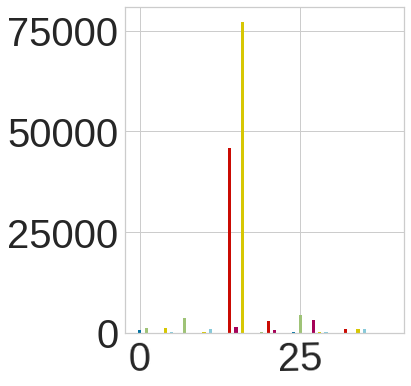

In [9]:
# Fill in the values to make the chart look clearer
figsize=(5, 6)
fig, ax = plt.subplots(figsize=figsize)
ax.tick_params(axis="y", labelsize=len(labels)) 
ax.tick_params(axis="x", rotation=1, labelsize=len(labels)) 
visualizer = ClassBalance(ax=ax, labels=labels)
visualizer.fit(y.values)        # Fit the data to the visualizer

In [10]:
# Remake fulldataset
FullDataset = df_train.append(df_test)

In [11]:
label_le = LabelEncoder()

## Convert labels to numeric numbers
FullDataset.protocol_type = LabelEncoder().fit_transform(FullDataset["protocol_type"])
FullDataset.service = LabelEncoder().fit_transform(FullDataset["service"])
FullDataset.flag = LabelEncoder().fit_transform(FullDataset["flag"])
FullDataset['org_label'] = FullDataset.label
FullDataset.label = label_le.fit_transform(FullDataset["label"])

# Drop label and difficulty as results shouldnt be used as the features to predict
X = FullDataset[cols].drop(['label','difficulty'], axis=1)
y = FullDataset.label
Encoded_TrainDataset = X[:125973]
Encoded_TrainResult = y[:125973]

Train size: 100778
Test size: 25195
Accuracy:  99.8293312165112


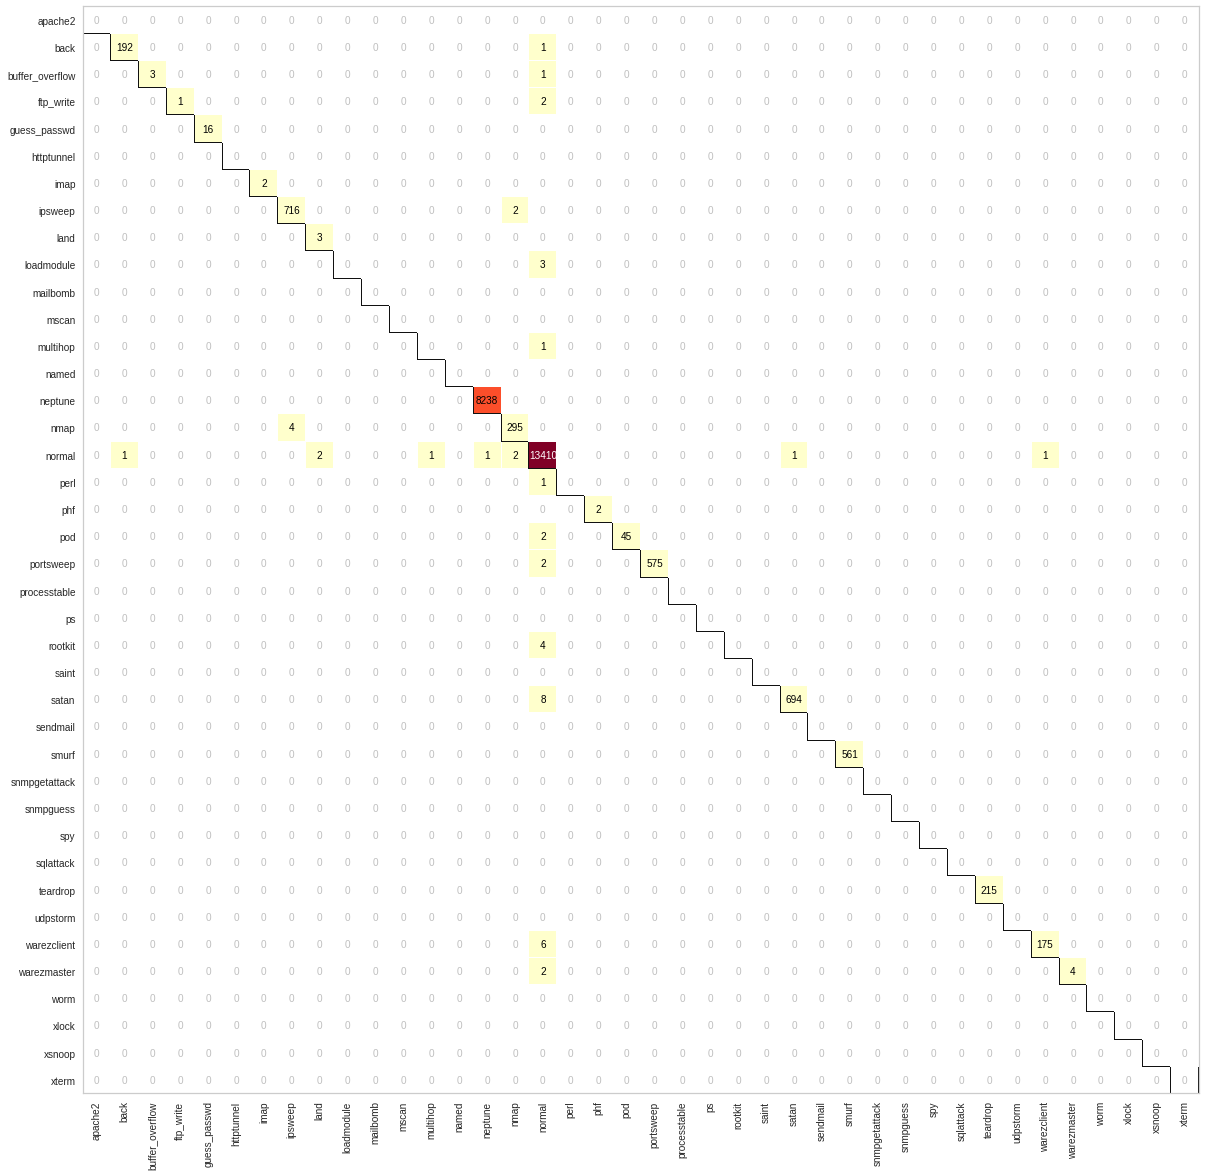

In [12]:
# Try different test_size and see if the outcome still works
X_train, X_test, y_train, y_test = train_test_split(Encoded_TrainDataset, Encoded_TrainResult, test_size=0.2)
model = RandomForestClassifier()
figsize=(20, 20)
fig, ax = plt.subplots(figsize=figsize)
ax.tick_params(axis="y", labelsize=18) 
ax.tick_params(axis="x", rotation=90, labelsize=18) 
cm = ConfusionMatrix(
    model, classes=labels,
    label_encoder=label_le,
    ax=ax
)
# Print out the confusion matrix
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

## Print accuracy of RandomForestClassifier()
model.fit(X_train, y_train)
print("Train size: " + str(len(X_train)))
print("Test size: " + str(len(X_test)))
print("Accuracy: ", model.score(X_test, y_test)* 100)

In [13]:
Encoded_TrainDataset2 = X[:125973]
Encoded_TrainResult2 = y[:125973]
Encoded_TestDataset2 = X[125973:]
Encoded_TestResult2 = y[125973:]

Train size: 125973
Test size: 22544
Accuracy:  72.24095102909865


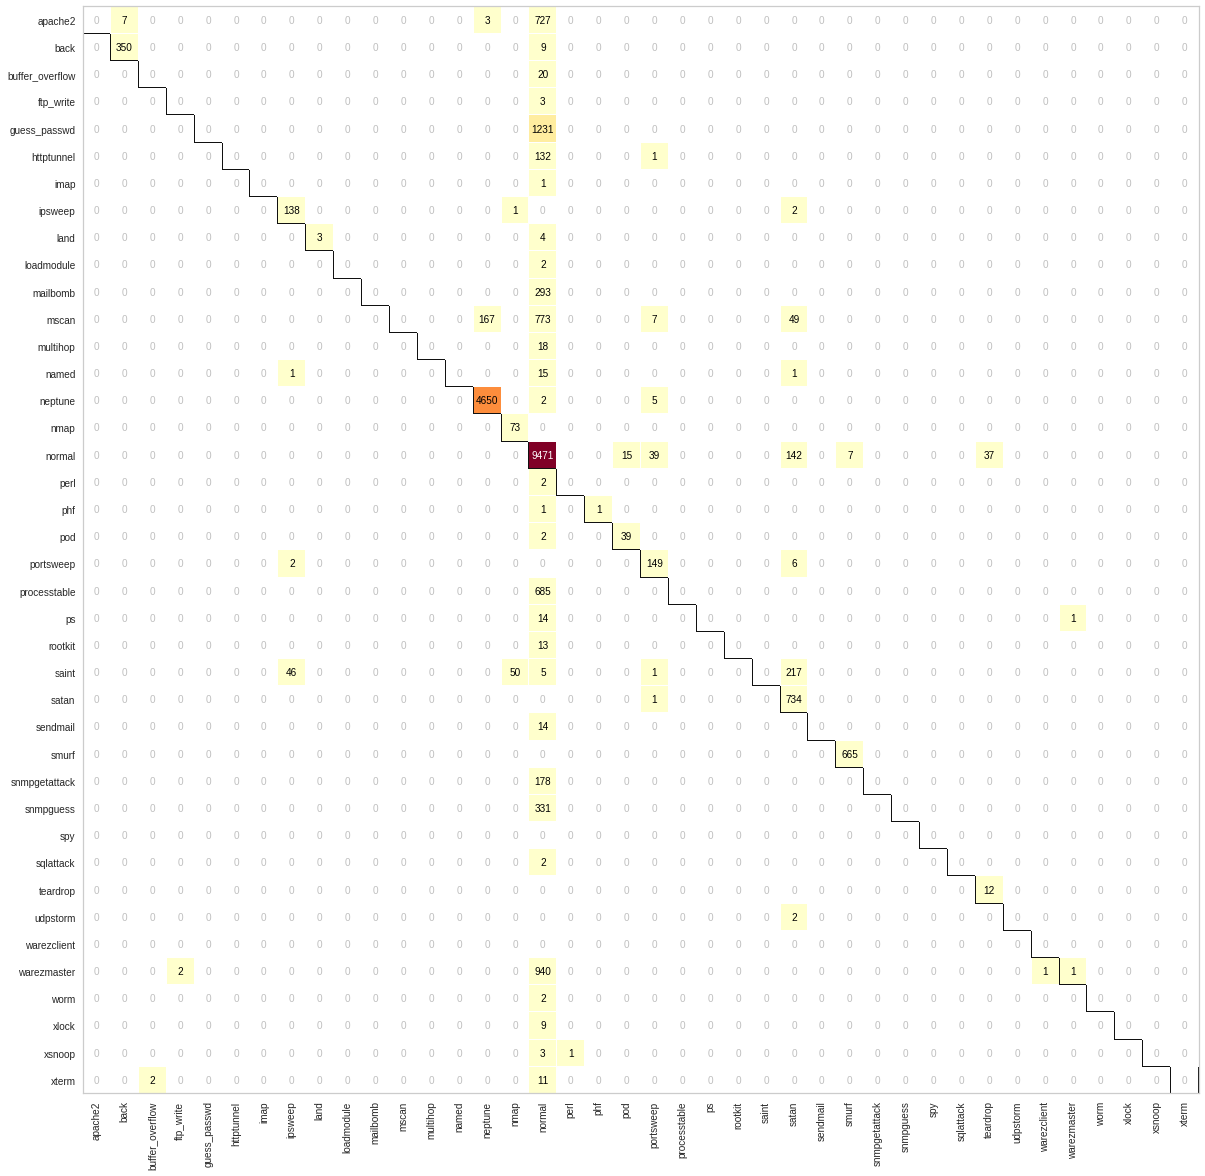

In [14]:
model2 = RandomForestClassifier()
figsize=(20, 20)
fig, ax = plt.subplots(figsize=figsize)
ax.tick_params(axis="y", labelsize=18) 
ax.tick_params(axis="x", rotation=90, labelsize=18) 
cm2 = ConfusionMatrix(
    model2, classes=labels,
    label_encoder=label_le,
    ax=ax
)

# Print out the confusion matrix
cm2.fit(Encoded_TrainDataset2, Encoded_TrainResult2)
cm2.score(Encoded_TestDataset2, Encoded_TestResult2)

## Print accuracy of RandomForestClassifier()
model2.fit(Encoded_TrainDataset2, Encoded_TrainResult2)
print("Train size: " + str(len(Encoded_TrainDataset2)))
print("Test size: " + str(len(Encoded_TestDataset2)))
print("Accuracy: ", model2.score(Encoded_TestDataset2, Encoded_TestResult2)* 100)

In [62]:
print("Model 1")
print("Accuracy: ", model.score(X_test, y_test)* 100)
print("Number of label: " + str(len(y_test.drop_duplicates())) )
print("Train&test size: " + str(len(X_test) + len(X_train)))
print('\n')
print("Model 2")
print("Accuracy: ", model2.score(Encoded_TestDataset2, Encoded_TestResult2)* 100)
print("Number of label: " + str(len(Encoded_TestResult2.drop_duplicates())))
print("Train&test size: " + str(len(Encoded_TestDataset2) + len(Encoded_TrainDataset2)))
print('\n')
print("Conclusion")
print("The remaining 22544 data consists of 16 additional labels. There is insufficient data for the 16 new labels.")
print("Furthermore, the data has imbalance classes problem.")
print("Hence, The accuracy is not a good metric for predictive models when classifying in predictive analytics.")

Model 1
Accuracy:  99.8293312165112
Number of label: 22
Train&test size: 125973


Model 2
Accuracy:  72.24095102909865
Number of label: 38
Train&test size: 148517


Conclusion
The remaining 22544 data consists of 16 additional labels. There is insufficient data for the 16 new labels.
Furthermore, the data has imbalance classes problem.
Hence, The accuracy is not a good metric for predictive models when classifying in predictive analytics.
